In [ ]:
import pandas as pd
from pprint import pprint

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
pip install Rouge BLEU sacrebleu

In [ ]:
from rouge import Rouge
from sacrebleu.metrics import BLEU

In [ ]:
corpus = pd.read_excel('corpus_inicial.xlsx')

In [ ]:
corpus.head()

,Column1,Column2,Column3,Column4
0,sentence_original,sentence_simplified,sentence_manual,pregunta_propuesta_Celina
1,4.º Que el Almanak ha de estar impreso y de ve...,El Almanak debe ser impreso y estar a la venta...,4.º El calendario debe ser impreso y estar a l...,¿Qué día se debe imprimir el calendario?
2,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,¿Cómo son generalmente la Leyes formularias?
3,De 12½ á una del dia 16 del pasado se perdió u...,"El día 16 del mes pasado, a las 12:30 de la ta...","El día 16 del mes pasado, entre las 12:30 y la...",¿Qué se perdió?
4,5.º Que si para el dia 1.º de noviembre no est...,Si el Almanak no está a la venta para el 1 de ...,5.º Si el Calendario no está a la venta para e...,¿Qué pasa si el calendario no está a la venta ...


Renombramos

In [ ]:
corpus = corpus.rename(columns={"Column1": "original", "Column2": "gpt","Column3":"manual","Column4":"Preguntas_propuestas"})

In [ ]:
corpus = corpus.drop(0)

Seleccionamos las que tienen la pregunta generada

In [ ]:
corpus.head()

,original,gpt,manual,Preguntas_propuestas
1,4.º Que el Almanak ha de estar impreso y de ve...,El Almanak debe ser impreso y estar a la venta...,4.º El calendario debe ser impreso y estar a l...,¿Qué día se debe imprimir el calendario?
2,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,¿Cómo son generalmente la Leyes formularias?
3,De 12½ á una del dia 16 del pasado se perdió u...,"El día 16 del mes pasado, a las 12:30 de la ta...","El día 16 del mes pasado, entre las 12:30 y la...",¿Qué se perdió?
4,5.º Que si para el dia 1.º de noviembre no est...,Si el Almanak no está a la venta para el 1 de ...,5.º Si el Calendario no está a la venta para e...,¿Qué pasa si el calendario no está a la venta ...
5,¡Quién le ha dicho á ese maligno que todos los...,¿Quién le ha dicho a esa persona malintenciona...,¡Quién le ha dicho a esa persona malintenciona...,¿Está haciendo una comparación?


Eliminamos las que tienen Nan

In [ ]:
corpus.dropna()

,original,gpt,manual,Preguntas_propuestas
1,4.º Que el Almanak ha de estar impreso y de ve...,El Almanak debe ser impreso y estar a la venta...,4.º El calendario debe ser impreso y estar a l...,¿Qué día se debe imprimir el calendario?
2,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,¿Como son generalmente la Leyes formularias?
3,De 12½ á una del dia 16 del pasado se perdió u...,"El día 16 del mes pasado, a las 12:30 de la ta...","El día 16 del mes pasado, entre las 12:30 y la...",¿Qué se perdió?
4,5.º Que si para el dia 1.º de noviembre no est...,Si el Almanak no está a la venta para el 1 de ...,5.º Si el Calendario no está a la venta para e...,¿Qué pasa si el calendario no está a la venta ...
5,¡Quién le ha dicho á ese maligno que todos los...,¿Quién le ha dicho a esa persona malintenciona...,¡Quién le ha dicho a esa persona malintenciona...,¿Está haciendo una comparación?
...,...,...,...,...
606,Se necesita para una de las bóticas mas antigu...,"Se busca un regente o gerente, con experiencia...","Se busca un gerente, con experiencia y buen ju...",¿Que edad se requiere para el trabajo?
607,"á sus razones, tal fuerza á sus reparos, tal p...","El autor tiene argumentos, objeciones y prueba...","Tiene argumentos, objeciones y pruebas que pue...",¿Que se intenta hacer al aportar los argumento...
608,se sirva insertar este aviso en su periódico p...,"Por favor, publique este aviso en su periódico...","Por favor, publique este aviso en su periódico...",¿A que horas hay que presentarse?
609,Señor editor del diario: mur señor o El singul...,Señor editor del periódico: Me complace inform...,Señor editor del periódico: Me complace inform...,¿A quien va dirigido el escrito?


In [ ]:
gpt35_100= pd.read_csv('traduccion_manual0-100.csv')
gpt35_300= pd.read_csv('traduccion_manual100-300.csv')
gpt35_500= pd.read_csv('traduccion_manual300-500.csv')
gpt35_600= pd.read_csv('traduccion_manual500-600.csv')

Concatenamos los resultados

In [ ]:
gpt35 = pd.concat([gpt35_100, gpt35_300,gpt35_500,gpt35_600])

In [ ]:
gpt35

,Unnamed: 0.1,Unnamed: 0,query,reference_contexts,reference_answer,reference_answer_by,query_by,traduccion
0,0,0,What is the deadline for the calendar to be pr...,['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-3.5-turbo),¿Cuál es la fecha límite para que el calendari...
1,1,1,How much should each printed copy of the calen...,['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-3.5-turbo),¿Cuánto debería costar cada copia impresa del ...
2,2,2,What is the price for a calendar with only one...,['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-3.5-turbo),¿Cuál es el precio de un calendario con solo u...
3,3,3,¿Por qué se menciona la importancia de las Ley...,['En este discurso dedicado al Supremo Consejo...,NaN,NaN,ai (gpt-3.5-turbo),¿Por qué se menciona la importancia de las Ley...
4,4,4,¿Cuáles son los daños que se mencionan en el d...,['En este discurso dedicado al Supremo Consejo...,NaN,NaN,ai (gpt-3.5-turbo),¿Cuáles son los daños que se mencionan en el d...
...,...,...,...,...,...,...,...,...
295,295,295,Where can interested individuals go to find a ...,['Un individuo que al final de esta semana deb...,NaN,NaN,ai (gpt-3.5-turbo),¿Dónde pueden ir las personas interesadas para...
296,296,296,What is the name and location of the store whe...,['Un individuo que al final de esta semana deb...,NaN,NaN,ai (gpt-3.5-turbo),¿Cuál es el nombre y la ubicación de la tienda...
297,297,297,Why has the board decided to delay the renewal...,['La junta ha notado que el público está acost...,NaN,NaN,ai (gpt-3.5-turbo),¿Por qué la junta directiva ha decidido retras...
298,298,298,How does the board plan to ensure the best ser...,['La junta ha notado que el público está acost...,NaN,NaN,ai (gpt-3.5-turbo),¿Cómo planea la junta asegurar el mejor servic...


In [ ]:
gpt35['reference_contexts'] = gpt35['reference_contexts'].apply(lambda x: x.replace('[','').replace(']','').replace("'",""))

In [ ]:
union = pd.merge(gpt35,corpus, left_on='reference_contexts', right_on='manual')[['manual','traduccion','Preguntas_propuestas']]

In [ ]:
union.head()

,manual,traduccion,Preguntas_propuestas
0,4.º El calendario debe ser impreso y estar a l...,¿Cuál es la fecha límite para que el calendari...,¿Qué día se debe imprimir el calendario?
1,4.º El calendario debe ser impreso y estar a l...,¿Cuánto debería costar cada copia impresa del ...,¿Qué día se debe imprimir el calendario?
2,4.º El calendario debe ser impreso y estar a l...,¿Cuál es el precio de un calendario con solo u...,¿Qué día se debe imprimir el calendario?
3,En este discurso dedicado al Supremo Consejo y...,¿Por qué se menciona la importancia de las Ley...,¿Cómo son generalmente la Leyes formularias?
4,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son los daños que se mencionan en el d...,¿Cómo son generalmente la Leyes formularias?


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
union.traduccion[220]

'¿Cuándo ocurrió el eclipse?'

In [ ]:
# Definir las predicciones y las referencias
predictions = ['¿Cundo ocurrió el eclipse?']
references = [
    union.Preguntas_propuestas[220]
]


# Cargar la métrica BLEU
bleu = evaluate.load("bleu")

# Calcular la métrica BLEU
results = bleu.compute(predictions=predictions, references=references)

# Mostrar los resultados
print(results)


{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 5, 'reference_length': 5}


In [ ]:
union = union.dropna()

In [ ]:
pip install evaluate

In [ ]:
import evaluate

In [ ]:
# Cargar la métrica BLEU
bleu = evaluate.load("bleu")

def bleu_resultado(pred,ref):
  predictions = [ pred]
  references = [ref ]

  results = bleu.compute(predictions=predictions, references=references)

  return results['bleu']

In [ ]:
union['bleu_score'] = union.apply(lambda x: bleu_resultado(x['traduccion'],x['Preguntas_propuestas']),axis=1)

In [ ]:
union.loc[union.bleu_score != 0]

,manual,traduccion,Preguntas_propuestas,bleu_score
24,Ben-Mogheiran cuenta en su libro llamado el Ni...,¿Quién es el autor del libro mencionado en el ...,¿Quién es el autor del libro?,0.304335
42,"Hoy, en la calle de la Concepción Gerónima núm...",¿Qué artículos estarán disponibles para la ven...,¿Dónde se llevará a cabo la venta pública?,0.125863
63,La Regencia del Reino está especialmente inter...,¿Por qué la Regencia del Reino está interesada...,¿En qué está interesada la Regencia del Reino?,0.182957
64,La Regencia del Reino está especialmente inter...,¿Qué decisión tomó la Regencia del Reino respe...,¿En qué está interesada la Regencia del Reino?,0.120216
66,5.º Si el Calendario no está a la venta para e...,¿Cuál es la consecuencia si el calendario no e...,¿Qué pasa si el calendario no está a la venta ...,0.408564
...,...,...,...,...
1613,"En la calle de Fuencarral, en la esquina de la...",¿Quién es el propietario de la propiedad donde...,¿En qué calle se encuentra la tienda de comest...,0.158965
1620,"Es muy honroso nacer de una familia noble, per...",¿Cuál es la importancia de cumplir con las res...,¿Qué es más honorable que nacer en una familia...,0.181852
1652,"El día 4 de este mes, a las diez de la mañana,...",¿Puedes identificar la ubicación específica do...,¿En qué calle se perdió el documento?,0.142166
1660,"Mediante este aviso, se informa a los acreedor...",¿Por qué se está informando a los acreedores y...,¿Es necesaria una citación formal?,0.119861


In [ ]:
max_bleu = max(union.bleu_score )

In [ ]:
max_bleu

1.0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
union_sin_cero = union.loc[union.bleu_score != 0]

In [ ]:
union_sin_cero.sort_values(by = 'bleu_score')

,manual,traduccion,Preguntas_propuestas,bleu_score
1450,Decimos lo mismo acerca de las asistencias a l...,¿Qué medidas se tomarán contra los eclesiástic...,¿Qué les pasará a los eclesiástico que desobed...,0.038431
728,En algunas provincias hay ríos con fuertes cor...,¿Por qué es importante tener precaución al nav...,¿Cómo son los rios en algunas provincias?,0.049754
347,A este número se deben agregar las 2000 person...,Si cada familia se multiplica por cinco indivi...,¿Cuánto es la suma de personas de ambos sexos?,0.077811
912,Todos los miembros de la compañía deberán pres...,¿Cuál es la fecha y hora específica en la que ...,¿A qué hora se deben presentar los miembros de...,0.080868
1171,Aquí es precisamente donde los Apólogistas y l...,"¿Por qué el significado de la palabra ""lujo"" e...",¿Cómo se conoce el significado de la palabra '...,0.085566
...,...,...,...,...
66,5.º Si el Calendario no está a la venta para e...,¿Cuál es la consecuencia si el calendario no e...,¿Qué pasa si el calendario no está a la venta ...,0.408564
878,Hoy se celebra el quinto día de Oración en el ...,¿A qué hora comienza el acto celebrando el fel...,¿A qué hora comienza el quinto día de Oración ...,0.434200
876,Hoy se celebra el quinto día de Oración en el ...,¿Qué se está celebrando en el Convento de Reli...,¿A qué hora comienza el quinto día de Oración ...,0.438507
871,Los tamborileros y flautistas que se han unido...,¿A quién deben presentarse los tamborileros y ...,¿Ante quién deben presentarse los tamborileros...,0.533168


- Hoy se celebra el quinto día de Oración en el Convento de Religiosas Capuchinas para dar gracias por el feliz parto de la Reina nuestra Señora, con la asistencia de la comunidad de eclesiásticos. El acto comienza a las 10 de la mañana.	¿Qué se está celebrando en el Convento de Religiosas Capuchinas en el quinto día de oración?	¿A qué hora comienza el quinto día de Oración en el Convento de Religiosas Capuchinas?	0.4385068972747104

- Los tamborileros y flautistas que se han unido voluntariamente a esta Milicia y que se mencionan a continuación, se presentarán lo más rápido posible al comandante del primer batallón, D. Juan Doz.	¿A quién deben presentarse los tamborileros y flautistas lo antes posible?	¿Ante quién deben presentarse los tamborileros y flautistas?	0.5331675363405771

- 	El horario incómodo y poco habitual, el frío de la noche y algunas ráfagas de viento que empañaban el cielo, haciendo que la Luna no se viera claramente, fueron las razones por las cuales no se pudo observar el eclipse en toda la duración de sus fases. El eclipse ocurrió la noche del Martes 11.	¿Cuándo ocurrió el eclipse?	¿Cuándo ocurrió el eclipse?	1.0

<ipython-input-61-af9033aae7d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(union_sin_cero.bleu_score, hist=True)


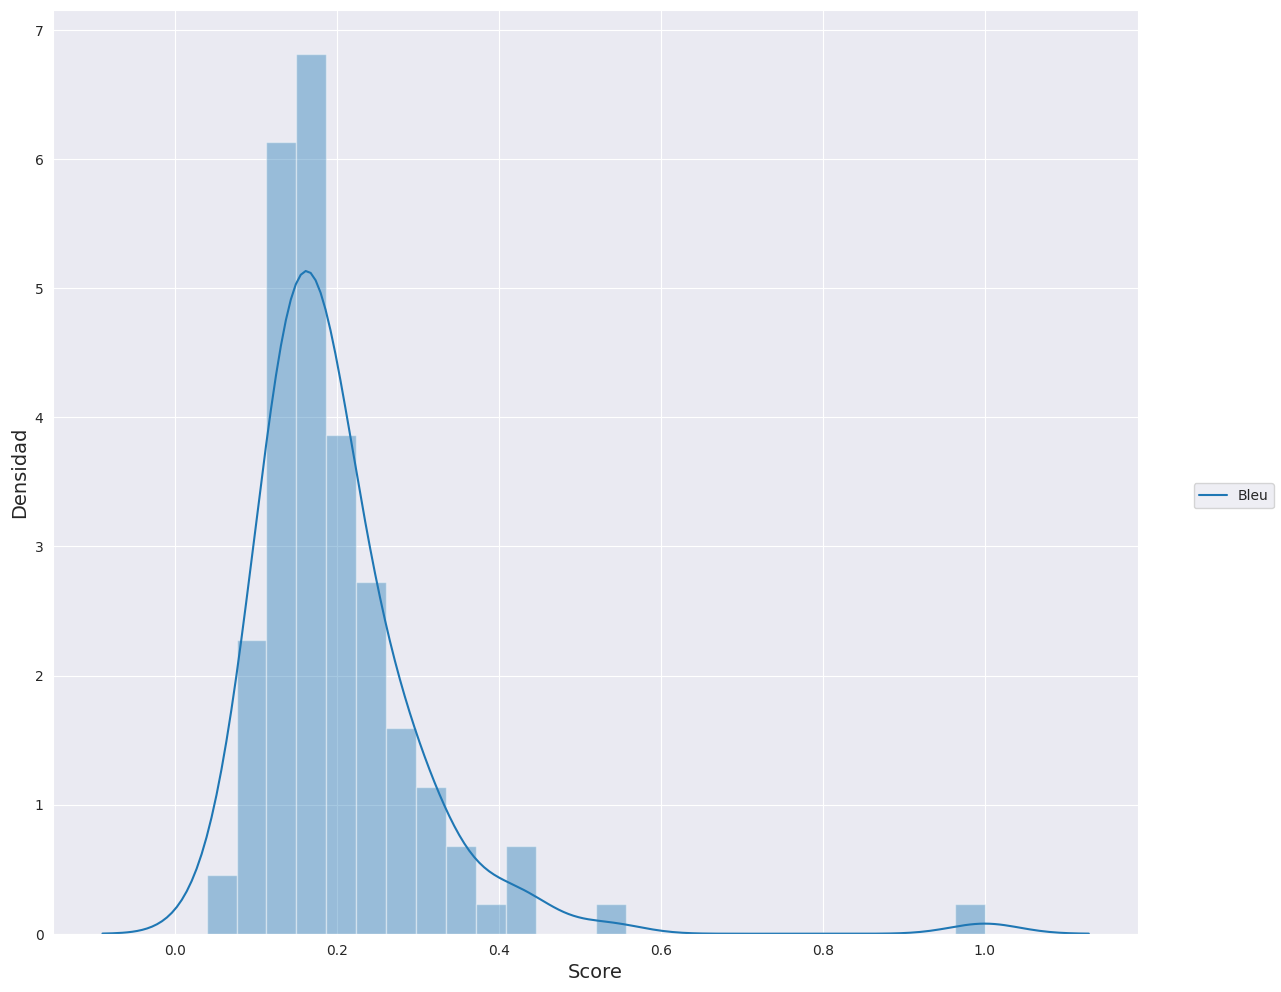

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(union_sin_cero.bleu_score, hist=True)
fig.legend(labels=['Bleu'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Score', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Finalmente mostramos el gráfico:
plt.show()

In [ ]:
rouge_scorer = Rouge()

def rouge_resultado(hypothesis,reference):
  score = rouge_scorer.get_scores(
      hyps=hypothesis,
      refs=reference,
  )
  return score[0]["rouge-1"]["f"]

In [ ]:
union['rouge_score'] = union.apply(lambda x: rouge_resultado(x['traduccion'],x['Preguntas_propuestas']),axis=1)

In [ ]:
union_sin_cero_ro = union.loc[union.rouge_score != 0]

In [ ]:
union_sin_cero_ro

,manual,traduccion,Preguntas_propuestas,bleu_score,rouge_score
0,4.º El calendario debe ser impreso y estar a l...,¿Cuál es la fecha límite para que el calendari...,¿Qué día se debe imprimir el calendario?,0.0,0.083333
2,4.º El calendario debe ser impreso y estar a l...,¿Cuál es el precio de un calendario con solo u...,¿Qué día se debe imprimir el calendario?,0.0,0.090909
3,En este discurso dedicado al Supremo Consejo y...,¿Por qué se menciona la importancia de las Ley...,¿Cómo son generalmente la Leyes formularias?,0.0,0.173913
4,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son los daños que se mencionan en el d...,¿Cómo son generalmente la Leyes formularias?,0.0,0.066667
5,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son los beneficios mencionados en el d...,¿Cómo son generalmente la Leyes formularias?,0.0,0.090909
...,...,...,...,...,...
1693,Nuestra comida será un plato de pisto hecho co...,¿Por qué la calabaza no está incluida en el pl...,¿En qué consistirá la comida?,0.0,0.181818
1697,Un individuo que al final de esta semana debe ...,¿Cuál es el nombre y la ubicación de la tienda...,¿Por donde se va a viajar?,0.0,0.064516
1698,La junta ha notado que el público está acostum...,¿Por qué la junta directiva ha decidido retras...,¿Cuándo se van a entregar los vales?,0.0,0.148148
1699,La junta ha notado que el público está acostum...,¿Cómo planea la junta asegurar el mejor servic...,¿Cuándo se van a entregar los vales?,0.0,0.083333


<ipython-input-67-2064f7d7dd7d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)


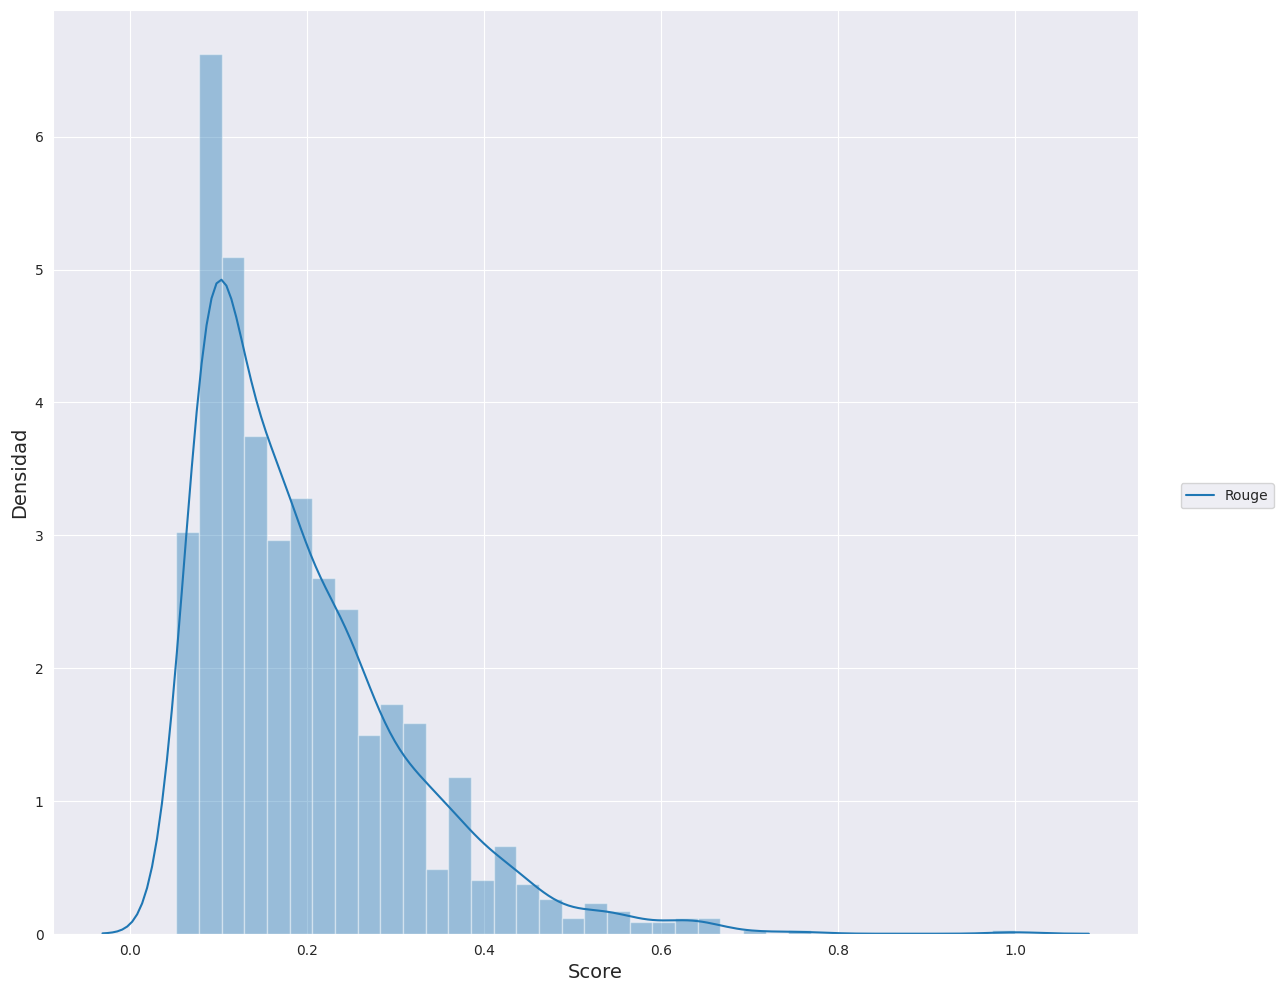

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
fig.legend(labels=['Rouge'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Score', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Finalmente mostramos el gráfico:
plt.show()

In [ ]:
max_ro = max(union.rouge_score )

In [ ]:
max_ro

0.999999995

In [ ]:
union_sin_cero_ro.sort_values(by = 'rouge_score')

,manual,traduccion,Preguntas_propuestas,bleu_score,rouge_score
299,La estación del año más adecuada para deshacer...,¿Qué beneficio se obtiene al eliminar correcta...,¿Cuándo es la mejor fecha para deshacerse de l...,0.000000,0.052632
1408,"Enhorabuena a nuestros cómicos, ya que según n...",¿What is questioned in relation to diversity i...,¿Qué están pensando hacer los cómicos?,0.000000,0.054054
398,"Algunos, que estaban muy influenciados por ide...",¿Cómo la aplicación errónea de las influencias...,¿Eran las ideas engañosas?,0.000000,0.054054
1249,¿Cuáles son las moléculas que componen el flui...,¿Por qué es importante reconocer la existencia...,¿Podemos ver las moleculas?,0.000000,0.054054
356,Hoy a las 5 de la tarde continúan las pruebas ...,¿What procedures will be carried out to treat ...,¿De qué edad es la persona enferma?,0.000000,0.055556
...,...,...,...,...,...
944,En el sexto día se celebraba la fiesta de Pent...,¿Cuántos días después de la Pascua del cordero...,¿Cuántos días hay entre la fiesta de la Pascua...,0.000000,0.666667
1155,El lujo es considerado en muchos casos como el...,¿Cómo se percibe a menudo el lujo en muchos ca...,¿Cómo se considera al lujo en muchos casos?,0.403528,0.666667
66,5.º Si el Calendario no está a la venta para e...,¿Cuál es la consecuencia si el calendario no e...,¿Qué pasa si el calendario no está a la venta ...,0.408564,0.714286
1012,"El señor Juan Bantista Buretre, profesor de fr...",¿Por qué el profesor suspendió las clases en s...,¿Por qué suspendió las clases de francés en su...,0.286561,0.761905


- Hoy se celebra el quinto día de Oración en el Convento de Religiosas Capuchinas para dar gracias por el feliz parto de la Reina nuestra Señora, con la asistencia de la comunidad de eclesiásticos. El acto comienza a las 10 de la mañana.	¿A qué hora comienza el acto celebrando el feliz nacimiento de la Reina Nuestra Señora en el Convento de Religiosas Capuchinas?	¿A qué hora comienza el quinto día de Oración en el Convento de Religiosas Capuchinas?	0.4341999352730602	0.6451612854526535
- En el sexto día se celebraba la fiesta de Pentecostés, que tenía lugar 50 días después de la fiesta de la Pascua del cordero. Esta festividad también se conocía como la fiesta de las semanas, debido a que se celebraba siete semanas después de la Pascua.	¿Cuántos días después de la Pascua del cordero ocurre la fiesta de Pentecostés?	¿Cuántos días hay entre la fiesta de la Pascua y la de Pentecostés?	0.0	0.6666666616780046
- El lujo es considerado en muchos casos como el uso de objetos que producen sensaciones agradables y que el hombre ha hecho necesarios para su felicidad, aunque en realidad no lo sean.	¿Cómo se percibe a menudo el lujo en muchos casos?	¿Cómo se considera al lujo en muchos casos?	0.403527863746399	0.6666666617283951
- 5.º Si el Calendario no está a la venta para el 1 de noviembre, la subasta será anulada y se realizará otra subasta a cargo del licitador anterior, para que el Calendario esté a la venta para el 1 de diciembre.	¿Cuál es la consecuencia si el calendario no está disponible para la venta para el 1 de noviembre?	¿Qué pasa si el calendario no está a la venta el 1 de noviembre?	0.4085639059221913	0.7142857093112245
-	El señor Juan Bantista Buretre, profesor de francés de las estudiantes del Real Monasterio de las Señoras Salesas de esta ciudad, con permiso del supremo Consejo, informa al público que hoy, 10 de Octubre, vuelve a abrir la academia de francés que tenía en su casa. Había suspendido las clases debido al calor. Las clases serán de 7:30 a 9:30 de la noche. Aquellos que estén interesados en inscribirse podrán encontrar al señor Buretre de 7 a 8 de la mañana y de 2 a 4 de la tarde en su casa, ubicada en la calle Preciados número 13, esquina con la calle Ternera.	¿Por qué el profesor suspendió las clases en su academia en su casa?	¿Por qué suspendió las clases de francés en su casa?	0.2865612242047131	0.7619047569160999
-	El horario incómodo y poco habitual, el frío de la noche y algunas ráfagas de viento que empañaban el cielo, haciendo que la Luna no se viera claramente, fueron las razones por las cuales no se pudo observar el eclipse en toda la duración de sus fases. El eclipse ocurrió la noche del Martes 11.

<ipython-input-72-038a5059a908>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
<ipython-input-72-038a5059a908>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)


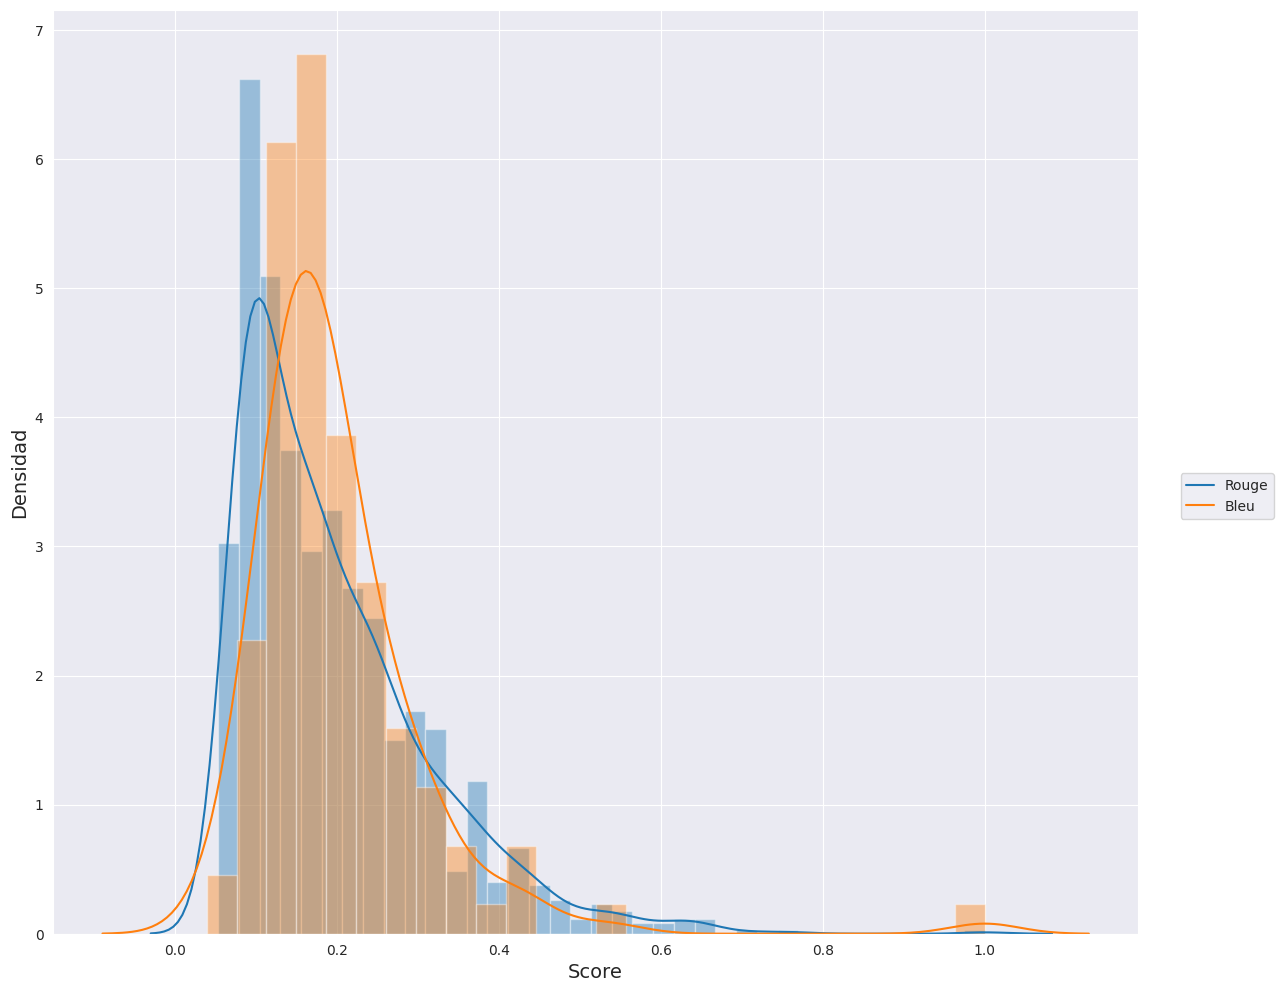

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)
fig.legend(labels=['Rouge','Bleu'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Score', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Finalmente mostramos el gráfico:
plt.show()

# GPT 4 mini


In [ ]:
gpt4_100= pd.read_csv('questions_manual0-100_gpt4-mini.csv')
gpt4_300= pd.read_csv('questions_manual100-300_gpt4-mini.csv')
gpt4_500= pd.read_csv('questions_manual300-500_gpt4-mini.csv')
gpt4_600= pd.read_csv('questions_manual500-600_gpt4-mini.csv')

In [ ]:
gpt4 = pd.concat([gpt4_100, gpt4_300,gpt4_500,gpt4_600])

In [ ]:
gpt4

,Unnamed: 0,query,reference_contexts,reference_answer,reference_answer_by,query_by
0,0,¿Cuál es la fecha límite para la impresión y v...,['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-4o-mini)
1,1,¿A qué precio debe venderse cada ejemplar impr...,['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-4o-mini)
2,2,"Según el documento, ¿cuál es el precio estable...",['4.º El calendario debe ser impreso y estar a...,NaN,NaN,ai (gpt-4o-mini)
3,3,¿Cuáles son las principales críticas que se me...,['En este discurso dedicado al Supremo Consejo...,NaN,NaN,ai (gpt-4o-mini)
4,4,¿Qué riesgos se identifican en relación con la...,['En este discurso dedicado al Supremo Consejo...,NaN,NaN,ai (gpt-4o-mini)
...,...,...,...,...,...,...
295,295,¿Dónde puede dirigirse una persona interesada ...,['Un individuo que al final de esta semana deb...,NaN,NaN,ai (gpt-4o-mini)
296,296,¿Cuál es el nombre del propietario de la tiend...,['Un individuo que al final de esta semana deb...,NaN,NaN,ai (gpt-4o-mini)
297,297,¿Cuál es la razón que ha dado la junta para el...,['La junta ha notado que el público está acost...,NaN,NaN,ai (gpt-4o-mini)
298,298,¿Qué fecha ha establecido la junta para comenz...,['La junta ha notado que el público está acost...,NaN,NaN,ai (gpt-4o-mini)


In [ ]:
gpt4['reference_contexts'] = gpt4['reference_contexts'].apply(lambda x: x.replace('[','').replace(']','').replace("'",""))

In [ ]:
union = pd.merge(gpt4,corpus, left_on='reference_contexts', right_on='manual')[['manual','query','Preguntas_propuestas']]

In [ ]:
union

,manual,query,Preguntas_propuestas
0,4.º El calendario debe ser impreso y estar a l...,¿Cuál es la fecha límite para la impresión y v...,¿Qué día se debe imprimir el calendario?
1,4.º El calendario debe ser impreso y estar a l...,¿A qué precio debe venderse cada ejemplar impr...,¿Qué día se debe imprimir el calendario?
2,4.º El calendario debe ser impreso y estar a l...,"Según el documento, ¿cuál es el precio estable...",¿Qué día se debe imprimir el calendario?
3,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son las principales críticas que se me...,¿Cómo son generalmente la Leyes formularias?
4,En este discurso dedicado al Supremo Consejo y...,¿Qué riesgos se identifican en relación con la...,¿Cómo son generalmente la Leyes formularias?
...,...,...,...
1696,Un individuo que al final de esta semana debe ...,¿Dónde puede dirigirse una persona interesada ...,¿Por dónde se va a viajar?
1697,Un individuo que al final de esta semana debe ...,¿Cuál es el nombre del propietario de la tiend...,¿Por dónde se va a viajar?
1698,La junta ha notado que el público está acostum...,¿Cuál es la razón que ha dado la junta para el...,¿Cuándo se van a entregar los vales?
1699,La junta ha notado que el público está acostum...,¿Qué fecha ha establecido la junta para comenz...,¿Cuándo se van a entregar los vales?


In [ ]:
union = union.dropna()

In [ ]:
union['bleu_score'] = union.apply(lambda x: bleu_resultado(x['query'],x['Preguntas_propuestas']),axis=1)

<ipython-input-25-7a6475c45e5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  union['bleu_score'] = union.apply(lambda x: bleu_resultado(x['query'],x['Preguntas_propuestas']),axis=1)


In [ ]:
union['rouge_score'] = union.apply(lambda x: rouge_resultado(x['query'],x['Preguntas_propuestas']),axis=1)

<ipython-input-26-098304ef9b3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  union['rouge_score'] = union.apply(lambda x: rouge_resultado(x['query'],x['Preguntas_propuestas']),axis=1)


In [ ]:
union_sin_cero = union.loc[union.bleu_score != 0]
union_sin_cero_ro = union.loc[union.rouge_score != 0]

<ipython-input-32-038a5059a908>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
<ipython-input-32-038a5059a908>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)


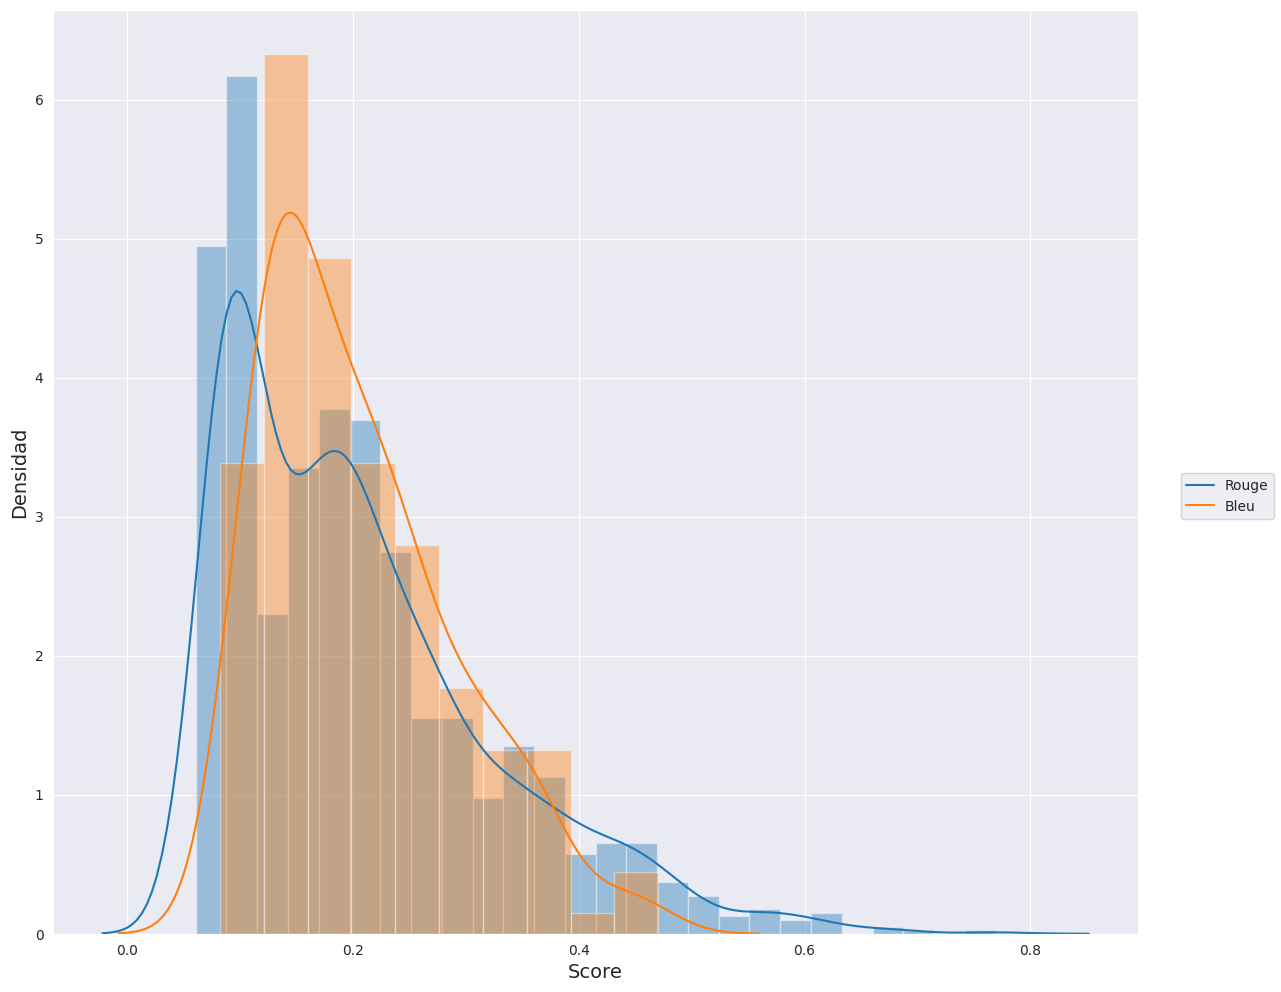

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)
fig.legend(labels=['Rouge','Bleu'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Score', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Finalmente mostramos el gráfico:
plt.show()

In [ ]:
union_sin_cero_ro.sort_values(by = 'rouge_score')

,manual,query,Preguntas_propuestas,bleu_score,rouge_score
875,Cada persona tiene el derecho de mejorar la in...,Resume en una frase la relación entre el inven...,¿Puede un inventor utilizar las mejores hechas...,0.000000,0.060606
1491,Como está establecido por las normas de la Igl...,Según las normas de la Iglesia mencionadas en ...,¿Qué se les ordena al Provisor y Vicario General?,0.000000,0.060606
1355,"¿Cuántas partículas minúsculas, insectos, hilo...","¿Qué implica la frase ""se escapan y se esconde...",¿Cómo son los insectos y moléculas?,0.000000,0.060606
120,Se propone un método experimental para revivir...,¿Qué tipo de estado se busca revivir en las pe...,¿Dónde se encuentra la librería?,0.000000,0.060606
919,"Sin esta medida, un pueblo como Madrid no pued...",¿Qué comparación se hace en el texto entre Mad...,¿Quiénes son las personas más afectadas por es...,0.000000,0.062500
...,...,...,...,...,...
1304,Se les informará a los acreedores sobre lo que...,¿Qué consecuencias se mencionan para aquellos ...,¿Qué les pasará a aquellos que no se presenten?,0.344844,0.631579
944,En el sexto día se celebraba la fiesta de Pent...,¿Cuántas semanas se celebran entre la Pascua y...,¿Cuántos días hay entre la fiesta de la Pascua...,0.333282,0.666667
157,El menader de las vacantes es un objeto simila...,¿De qué material está hecha la punta del menad...,¿De qué está hecho el menader de las vacantes?,0.343893,0.666667
66,5.º Si el Calendario no está a la venta para e...,¿Qué sucederá si el Calendario no está a la ve...,¿Qué pasa si el calendario no está a la venta ...,0.359859,0.689655


In [ ]:
union_sin_cero.sort_values(by = 'bleu_score')

,manual,query,Preguntas_propuestas,bleu_score,rouge_score
1047,Todos los acreedores reconocidos en el concurs...,¿Cuál es la fecha y hora en la que deben prese...,¿Cuándo deben presentarse los acreedores?,0.082181,0.214286
1104,"En la calle de la Cruz, junto a la Compañía de...",¿Cuál es el nombre de la obra de teatro que se...,¿Cómo se llama la obra de teatro?,0.083093,0.285714
1425,En el coliseo de la calle de la Cruz se presen...,¿Cuál es el título de la obra de teatro que se...,¿Cómo se llama la obra de teatro?,0.092516,0.307692
479,Nuevas fuerzas se consiguen con una carta infe...,¿Quién es el personaje que recibe aclamaciones...,¿Qué se anuncia en la carta?,0.095624,0.285714
1613,"En la calle de Fuencarral, en la esquina de la...",¿A quién se menciona como el propietario del l...,¿En qué calle se encuentra la tienda de comest...,0.096151,0.322581
...,...,...,...,...,...
1087,El Ayuntamiento de la ciudad de Madrid celebra...,¿Dónde se llevará a cabo la celebración en hon...,¿Dónde se llevará a cabo la celebración?,0.385032,0.571429
991,"Si alguien quiere comprarla, deberá dar inform...",¿Cuál es la profesión del Sr. Antonio Garcia y...,¿Cuál es la profesión del Sr. Antonio García?,0.426499,0.608696
1129,"El Sr. duque del Infantado, propietario de las...",¿Dónde se encuentra la oficina de contabilidad...,¿Cómo son conocidas las fincas del Sr. duque d...,0.432423,0.400000
1029,La administración principal de la renta de Lot...,¿Por qué está vacante la administración princi...,¿Por qué está vacantge la administración princ...,0.453078,0.769231


# Mixtral

In [ ]:
mistral = pd.read_csv('preguntas_mistral_original_manual.csv')

In [ ]:
mistral

,Unnamed: 0,original,gpt,manual,Preguntas_original,Preguntas_manual
0,0,4.º Que el Almanak ha de estar impreso y de ve...,El Almanak debe ser impreso y estar a la venta...,4.º El calendario debe ser impreso y estar a l...,¿Cuándo debe estar impreso y a la venta el Alm...,¿Cuál es la fecha límite para que el Almanak e...
1,1,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,En este discurso dedicado al Supremo Consejo y...,1. ¿Qué aspectos específicos se mencionan sobr...,1. ¿Qué se discute en el discurso dirigido al ...
2,2,De 12½ á una del dia 16 del pasado se perdió u...,"El día 16 del mes pasado, a las 12:30 de la ta...","El día 16 del mes pasado, entre las 12:30 y la...",¿A qué hora y en qué fecha desapareció el perr...,¿Qué raza de perro se perdió el día 16 del mes...
3,3,5.º Que si para el dia 1.º de noviembre no est...,Si el Almanak no está a la venta para el 1 de ...,5.º Si el Calendario no está a la venta para e...,¿Qué sucede si el Almanak no está disponible p...,¿Qué sucede si el Almanak no está disponible p...
4,4,¡Quién le ha dicho á ese maligno que todos los...,¿Quién le ha dicho a esa persona malintenciona...,¡Quién le ha dicho a esa persona malintenciona...,¿Quién considera a los participantes del juego...,¿Quién podría haber informado a esa persona ma...
...,...,...,...,...,...,...
622,622,Se necesita para una de las bóticas mas antigu...,"Se busca un regente o gerente, con experiencia...","Se busca un gerente, con experiencia y buen ju...",¿Qué requisitos se solicitan para el puesto de...,¿Qué tipo de habilidades y experiencia se busc...
623,623,"á sus razones, tal fuerza á sus reparos, tal p...","El autor tiene argumentos, objeciones y prueba...","Tiene argumentos, objeciones y pruebas que pue...",¿Qué noticias causaron turbación y terror en l...,¿Qué tipo de pruebas o evidencias presenta el ...
624,624,se sirva insertar este aviso en su periódico p...,"Por favor, publique este aviso en su periódico...","Por favor, publique este aviso en su periódico...",¿Qué tipo de información se solicita a los acr...,¿Cuál es el contenido del aviso que se debe pu...
625,625,Señor editor del diario: mur señor o El singul...,Señor editor del periódico: Me complace inform...,Señor editor del periódico: Me complace inform...,¿Qué reacción causó la llegada del señor D. FE...,1. ¿Quién es el autor de la carta original men...


In [ ]:
mistral = mistral.rename(columns={'manual':'frase','Preguntas_manual':'pregunta_generada'})[[ "frase","pregunta_generada"]]

In [ ]:
mistral.loc[mistral['frase'] == 'Por ahora, extendemos las licencias de Oratorio privado de aquellos que han estado utilizando varios de nuestros ciudadanos en sus hogares o en sus casas de campo para celebrar la Misa. Nos reservamos el derecho de proporcionar lo más conveniente en este asunto en el momento adecuado.']['pregunta_generada'][509]

'1. ¿Qué medidas ha tomado la Regencia del Reino para conservar la tranquilidad interior de sus pueblos y ayudar a aquellos que han quedado libres de la dominación enemiga?\n2. ¿Quién ha resuelto salir a visitar las Estaciones en compañía de la Reina nuestra Señora y otros?\n3. ¿Qué autoridades ocupan cargos en el Ayuntamiento, la junta general de Comercio y Moneda en la provincia, y la capital junto con su partido?'

In [ ]:
mistral["pregunta_generada"] = mistral["pregunta_generada"].apply(lambda x: str(x).replace('? ¿','? \n ¿') )

In [ ]:
# Dividir la columna en filas manteniendo las otras columnas
corpus_mixtral_expanded = mistral.set_index(['frase'])['pregunta_generada'].str.split('\n').apply(pd.Series).stack().reset_index()

# Renombrar las columnas resultantes
corpus_mixtral_expanded.columns = ['frase','level', 'pregunta_generada']

In [ ]:
corpus_mixtral_expanded

,frase,level,pregunta_generada
0,4.º El calendario debe ser impreso y estar a l...,0,¿Cuál es la fecha límite para que el Almanak e...
1,4.º El calendario debe ser impreso y estar a l...,1,¿A qué precio se debe vender cada ejemplar imp...
2,4.º El calendario debe ser impreso y estar a l...,2,¿Cuál será la consecuencia si el Almanak no es...
3,En este discurso dedicado al Supremo Consejo y...,0,1. ¿Qué se discute en el discurso dirigido al ...
4,En este discurso dedicado al Supremo Consejo y...,1,2. ¿Cuáles son los daños que se mencionan en e...
...,...,...,...
1874,Señor editor del periódico: Me complace inform...,1,2. ¿Qué impacto ha tenido la llegada del señor...
1875,Señor editor del periódico: Me complace inform...,2,3. ¿Cómo ha reaccionado la población ante la n...
1876,"Amigo mío, que no son los tiempos para delicad...",0,1. ¿Qué tipo de aviso deberían dar al director...
1877,"Amigo mío, que no son los tiempos para delicad...",1,"2. ¿Cuál es la habilidad que, según la informa..."


In [ ]:
union = pd.merge(corpus_mixtral_expanded,corpus, left_on='frase', right_on='manual')[['manual','pregunta_generada','Preguntas_propuestas']]

In [ ]:
union["pregunta_generada"] = union["pregunta_generada"].apply(lambda x: str(x).replace('1. ','').replace('2. ','').replace('3. ','') )

In [ ]:
union = union.dropna()

In [ ]:
union

,manual,pregunta_generada,Preguntas_propuestas
0,4.º El calendario debe ser impreso y estar a l...,¿Cuál es la fecha límite para que el Almanak e...,¿Qué día se debe imprimir el calendario?
1,4.º El calendario debe ser impreso y estar a l...,¿A qué precio se debe vender cada ejemplar imp...,¿Qué día se debe imprimir el calendario?
2,4.º El calendario debe ser impreso y estar a l...,¿Cuál será la consecuencia si el Almanak no es...,¿Qué día se debe imprimir el calendario?
3,En este discurso dedicado al Supremo Consejo y...,¿Qué se discute en el discurso dirigido al Sup...,¿Cómo son generalmente la Leyes formularias?
4,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son los daños que se mencionan en el t...,¿Cómo son generalmente la Leyes formularias?
...,...,...,...
2168,Señor editor del periódico: Me complace inform...,¿Qué impacto ha tenido la llegada del señor D....,¿A quién va dirigido el escrito?
2169,Señor editor del periódico: Me complace inform...,¿Cómo ha reaccionado la población ante la noti...,¿A quién va dirigido el escrito?
2170,"Amigo mío, que no son los tiempos para delicad...",¿Qué tipo de aviso deberían dar al director al...,¿Sabe la persona que escribe el texto cantar?
2171,"Amigo mío, que no son los tiempos para delicad...","¿Cuál es la habilidad que, según la informació...",¿Sabe la persona que escribe el texto cantar?


In [ ]:
union['bleu_score'] = union.apply(lambda x: bleu_resultado(x['pregunta_generada'],x['Preguntas_propuestas']),axis=1)

In [ ]:
union['rouge_score'] = union.apply(lambda x: rouge_resultado(x['pregunta_generada'],x['Preguntas_propuestas']),axis=1)

In [ ]:
union.loc[union['rouge_score'] ==  0.000000]

,manual,pregunta_generada,Preguntas_propuestas,bleu_score,rouge_score
5,En este discurso dedicado al Supremo Consejo y...,¿Qué beneficios se destacan al aplicar el form...,¿Cómo son generalmente la Leyes formularias?,0.0,0.0
12,¡Quién le ha dicho a esa persona malintenciona...,¿Quién podría haber informado a esa persona ma...,¿Está haciendo una comparación?,0.0,0.0
13,¡Quién le ha dicho a esa persona malintenciona...,¿Es consciente de la similitud entre los escl...,¿Está haciendo una comparación?,0.0,0.0
14,¡Quién le ha dicho a esa persona malintenciona...,¿Qué diferencias reales existen entre los div...,¿Está haciendo una comparación?,0.0,0.0
15,Según la orden del alcalde de la ciudad Don Ma...,¿Quién ha programado la subasta del reloj de m...,¿Cómo se llama el alcalde?,0.0,0.0
...,...,...,...,...,...
2138,"En la actualidad, hay muchos musulmanes que vi...",¿Quién era el mayor privado del califa Harouna...,¿En cuántos grupos se dividen los bereberes?,0.0,0.0
2140,Si alguien quiere ir en diligencia a Andalucía...,¿Dónde puede alguien obtener más información s...,¿Cuál es el nombre del meson?,0.0,0.0
2141,Si alguien quiere ir en diligencia a Andalucía...,¿Qué tipo de transporte de regreso a Cádiz o s...,¿Cuál es el nombre del meson?,0.0,0.0
2142,Si alguien quiere ir en diligencia a Andalucía...,¿Qué dirección se menciona como punto de refer...,¿Cuál es el nombre del meson?,0.0,0.0


In [ ]:
union['pregunta_generada'][15]

'¿Quién ha programado la subasta del reloj de mesa de bronce con figura de mujer? '

In [ ]:
union_sin_cero = union.loc[union.bleu_score != 0]
union_sin_cero_ro = union.loc[union.rouge_score != 0]

In [ ]:
print(len(union_sin_cero))
print(len(union_sin_cero_ro))

138
1487


<ipython-input-71-038a5059a908>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
<ipython-input-71-038a5059a908>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)


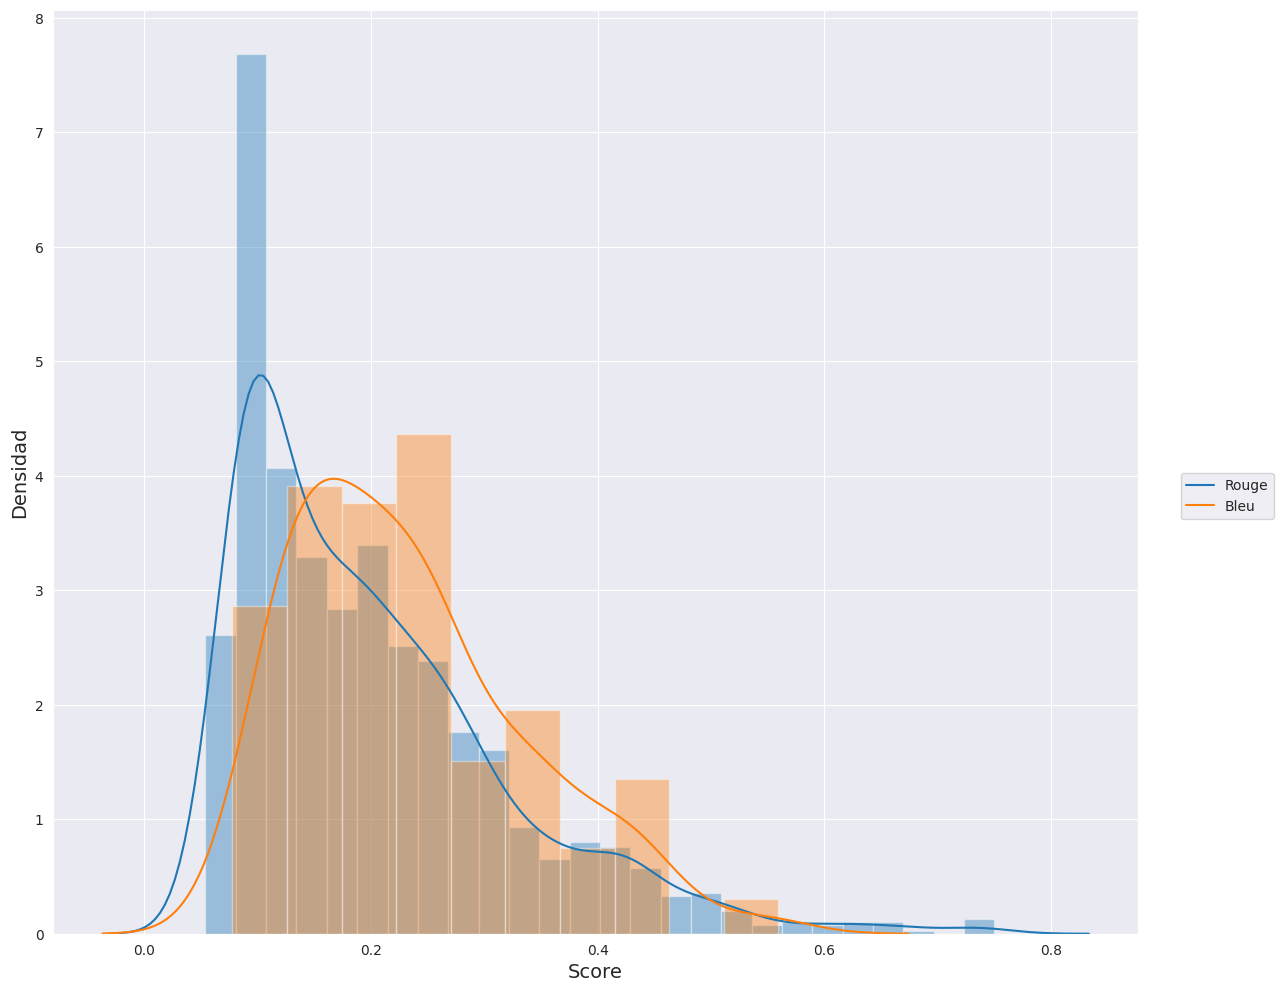

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(union_sin_cero_ro.rouge_score, hist=True)
plt2 = sns.distplot(union_sin_cero.bleu_score, hist=True)
fig.legend(labels=['Rouge','Bleu'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Score', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Finalmente mostramos el gráfico:
plt.show()

In [ ]:
union_sin_cero_ro.sort_values(by = 'rouge_score')

,manual,pregunta_generada,Preguntas_propuestas,bleu_score,rouge_score
1869,Solo las personas egoístas a las que les impor...,¿Qué actitud podrían tener las personas egoíst...,¿Qué está pasando en Andalucía?,0.000000,0.054054
1849,"Por ahora, extendemos las licencias de Oratori...",¿Qué medidas ha tomado la Regencia del Reino p...,¿A quién se le extiende las licencias de Orato...,0.000000,0.057143
2166,"Por favor, publique este aviso en su periódico...",¿En qué horarios pueden presentarse las person...,¿A qué horas hay que presentarse?,0.000000,0.057143
1441,Todos los acreedores reconocidos en el concurs...,¿Qué consecuencias enfrentarán los acreedores ...,¿Cuándo deben presentarse los acreedores?,0.000000,0.057143
1611,Con el fin de cumplir con los artículos mencio...,¿Cuál es la importancia de presentar un testim...,¿Qué establece la ley?,0.000000,0.058824
...,...,...,...,...,...
2002,"En la calle de Fuencarral, en la esquina de la...",¿En qué calle y número se encuentra la tienda ...,¿En qué calle se encuentra la tienda de comest...,0.457231,0.727273
987,Dice en la página cuarta que comienzan las dif...,¿Por qué se menciona en la página cuarta que c...,¿En qué página comienzan las dificultades en l...,0.396538,0.727273
1501,"Cuando se suscriba, recibirá las estampas que ...",¿Cuál es el intervalo de tiempo entre cada en...,¿Cuál es el plazo de entrega entre las estampas?,0.000000,0.736842
9,5.º Si el Calendario no está a la venta para e...,¿Qué sucede si el Almanak no está disponible p...,¿Qué pasa si el calendario no está a la venta ...,0.457883,0.740741


In [ ]:
union_sin_cero.sort_values(by = 'bleu_score')

,manual,pregunta_generada,Preguntas_propuestas,bleu_score,rouge_score
1968,Si alguien encontró unas gafas de teatro que s...,¿Qué día específico se menciona en el texto pa...,¿Dónde se perdieron las gafas de teatro?,0.077811,0.250000
1967,Si alguien encontró unas gafas de teatro que s...,¿Quién es la persona a la que se deben entrega...,¿Dónde se perdieron las gafas de teatro?,0.080365,0.250000
88,La Regencia del Reino está especialmente inter...,¿Qué medidas tomó la Regencia del Reino con re...,¿En qué está interesada la Regencia del Reino?,0.099702,0.206897
1605,(3.) Se utiliza para referirse a una lluvia ab...,¿Qué término se emplea para describir una lluv...,¿En qué se salvaron Deucalión y Pirra?,0.099702,0.275862
1187,El Sr. Inspector General de Milicias Provincia...,¿Dónde deben acudir las personas interesadas e...,¿Qué tiene intención de construir el Sr. Inspe...,0.100084,0.193548
...,...,...,...,...,...
2002,"En la calle de Fuencarral, en la esquina de la...",¿En qué calle y número se encuentra la tienda ...,¿En qué calle se encuentra la tienda de comest...,0.457231,0.727273
9,5.º Si el Calendario no está a la venta para e...,¿Qué sucede si el Almanak no está disponible p...,¿Qué pasa si el calendario no está a la venta ...,0.457883,0.740741
1037,"En el parador de la Cruz, ubicado en la calle ...",¿Qué ofrece Mamerto Moreno en el parador de la...,¿Dónde se ubica el parador de la Cruz?,0.461737,0.555556
171,El menader de las vacantes es un objeto simila...,¿Qué materiales componen el menader de las vac...,¿De qué está hecho el menader de las vacantes?,0.525624,0.588235
